<ipython-input-6-3c25699403f4>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


📊 Mean Squared Error (MSE): 102.3436
🎯 Coeficiente de Determinação (R²): 0.9984

🔥 Importância das Features:

               Feature  Importance
7             Quantity    0.518599
8           Unit price    0.479319
6               Rating    0.000599
11  Avg_Ticket_Product    0.000227
4         Product line    0.000211
9          Part_of_Day    0.000201
5              Payment    0.000178
1                 City    0.000170
0               Branch    0.000168
2        Customer type    0.000120
3               Gender    0.000113
10          Is_Weekend    0.000095


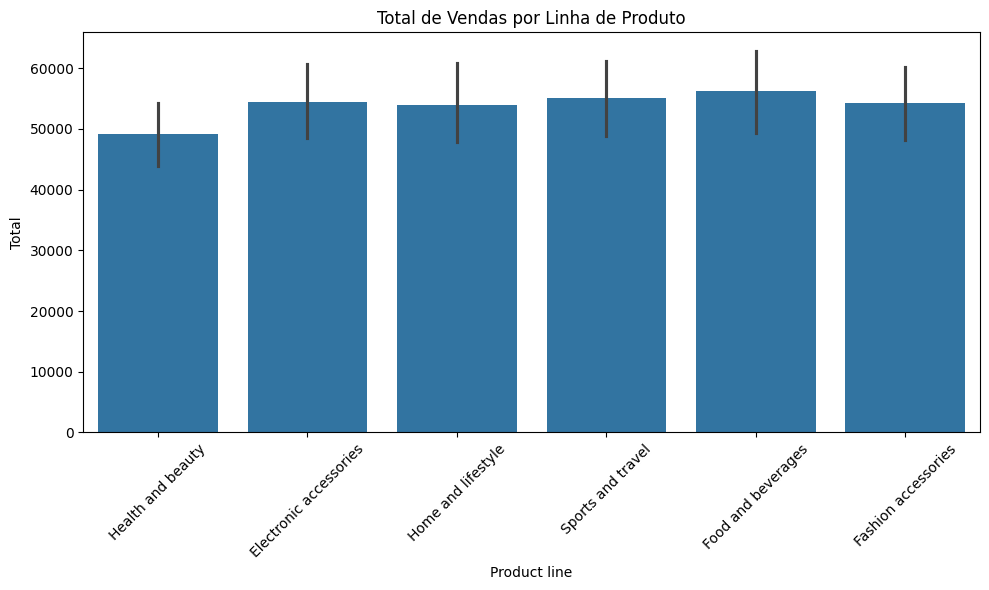

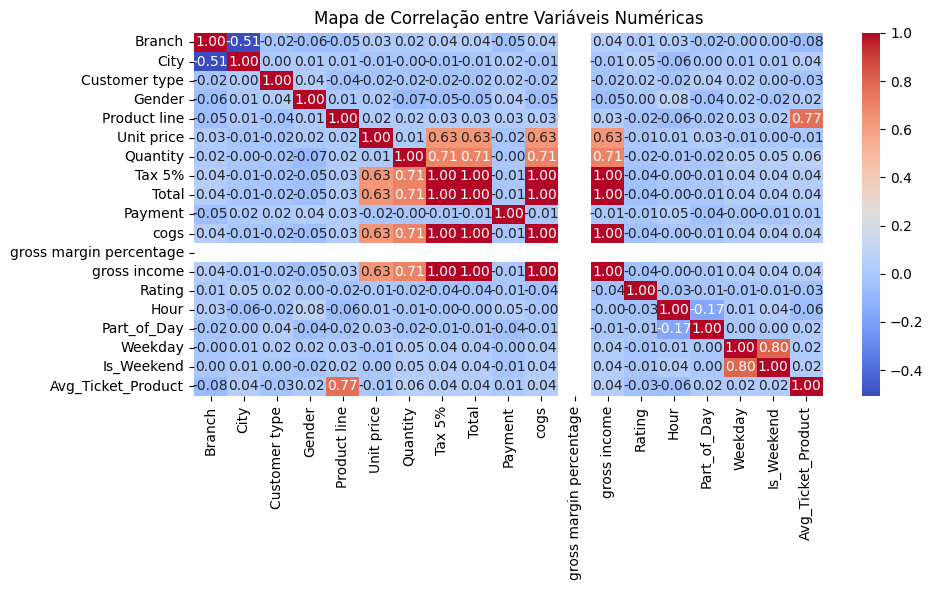

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 📁 1. Carregar os Dados
df = pd.read_csv('supermarket_sales.csv')

# 🧹 2. Pré-processamento
# Convertendo colunas de data e hora, e criando variáveis derivadas
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Part_of_Day'] = df['Hour'].apply(lambda x: 'Morning' if x < 12 else 'Afternoon' if x < 17 else 'Evening')
df['Weekday'] = df['Date'].dt.dayofweek
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# 🎯 3. Feature Engineering
# Ticket médio por linha de produto
avg_ticket = df.groupby('Product line')['Total'].mean().to_dict()
df['Avg_Ticket_Product'] = df['Product line'].map(avg_ticket)

# 💡 4. Encoding de variáveis categóricas
# Convertendo categorias para números com LabelEncoder
df_encoded = df.copy()
le = LabelEncoder()
cols_to_encode = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Part_of_Day']
for col in cols_to_encode:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 🧠 5. Seleção de Features e Target
features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
            'Rating', 'Quantity', 'Unit price', 'Part_of_Day', 'Is_Weekend', 'Avg_Ticket_Product']
X = df_encoded[features]
y = df_encoded['Total']

# ✂️ 6. Divisão em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 7. Treinamento do Modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📈 8. Avaliação
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'📊 Mean Squared Error (MSE): {mse:.4f}')
print(f'🎯 Coeficiente de Determinação (R²): {r2:.4f}')

# 🔥 9. Importância das Features
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔥 Importância das Features:\n")
print(importances)

# 💾 10. Visualizações e Salvando Gráficos
os.makedirs("images", exist_ok=True)

# Total de Vendas por Linha de Produto
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', data=df, estimator=sum)
plt.title('Total de Vendas por Linha de Produto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/total_vendas_produto.png")
plt.show()

# Heatmap de Correlação
plt.figure(figsize=(10, 6))
numeric_data = df_encoded.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.savefig("images/heatmap_correlacao.png")
plt.show()